In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_results(images, titles):
    """
    Display multiple images in a row using matplotlib
    
    Args:
        images (list): List of images to display
        titles (list): List of titles for each image
        
    Raises:
        ValueError: If lengths of images and titles don't match
        TypeError: If inputs are not lists or if images are not valid numpy arrays
    """
    # Input validation
    if not isinstance(images, list) or not isinstance(titles, list):
        raise TypeError("Both images and titles must be lists")
    if len(images) != len(titles):
        raise ValueError("Number of images must match number of titles")
    if len(images) == 0:
        raise ValueError("At least one image is required")
    
    # Create subplot layout
    fig, axes = plt.subplots(1, len(images), figsize=(5*len(images), 5))
    
    # Convert axes to array if single image
    if len(images) == 1:
        axes = np.array([axes])
    
    # Display each image
    for i, (img, title) in enumerate(zip(images, titles)):
        if not isinstance(img, np.ndarray):
            raise TypeError(f"Image at index {i} is not a valid numpy array")
            
        # Convert 3D images with 3 channels to RGB for proper display
        if len(img.shape) == 3 and img.shape[2] == 3:
            # OpenCV uses BGR, convert to RGB for matplotlib
            img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        else:
            img_display = img
            
        axes[i].imshow(img_display, cmap='gray' if len(img.shape) == 2 else None)
        axes[i].set_title(title)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

def create_sample_image(width=400, height=200, text="OpenCV", noise_prob=0.05):
    """
    Create a sample binary image with text and noise
    
    Args:
        width (int): Width of the image
        height (int): Height of the image
        text (str): Text to display in the image
        noise_prob (float): Probability of noise (between 0 and 1)
        
    Returns:
        numpy.ndarray: Generated noisy image
        
    Raises:
        ValueError: If dimensions are invalid or noise_prob is out of range
    """
    # Input validation
    if width <= 0 or height <= 0:
        raise ValueError("Width and height must be positive")
    if not 0 <= noise_prob <= 1:
        raise ValueError("Noise probability must be between 0 and 1")
    
    # Create base image
    img = np.ones((height, width), dtype=np.uint8) * 255
    
    # Calculate text size and position
    font_scale = min(width, height) / 200  # Scale font based on image size
    text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 3)[0]
    text_x = (width - text_size[0]) // 2
    text_y = (height + text_size[1]) // 2
    
    # Add text
    cv2.putText(img, text, (text_x, text_y), 
                cv2.FONT_HERSHEY_SIMPLEX, font_scale, 0, 3)
    
    # Create noise with the same data type as the image
    noise = np.random.choice([0, 255], 
                           size=(height, width), 
                           p=[noise_prob, 1-noise_prob]).astype(np.uint8)
    
    # Combine image and noise
    noisy_img = cv2.bitwise_and(img, noise)
    
    return noisy_img


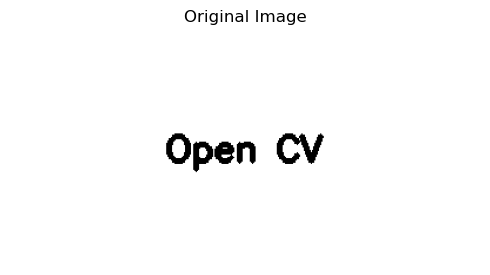

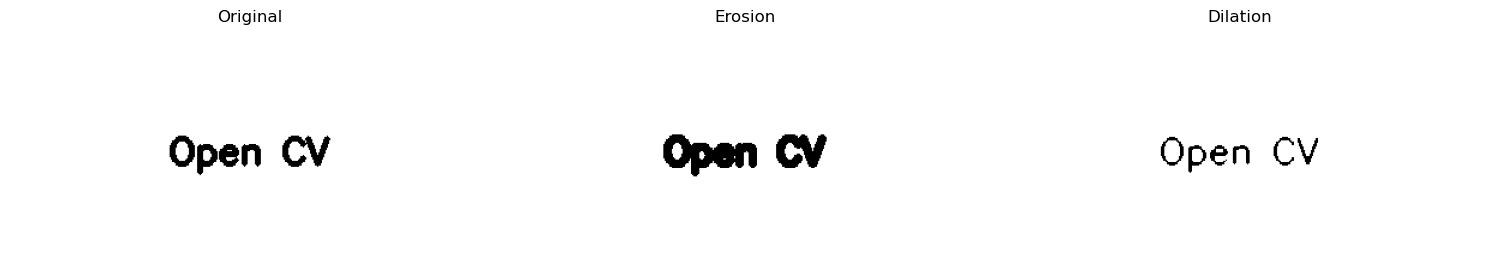

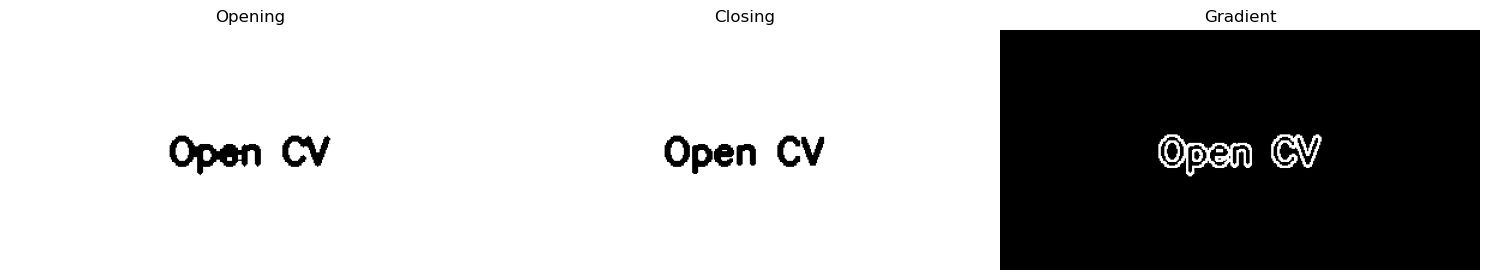

In [19]:

original = create_sample_image(width=400, height=200, text="Open CV", noise_prob=0.0)
show_results([original], ['Original Image'])


# Define kernels
kernel_3x3 = np.ones((3, 3), np.uint8)
kernel_5x5 = np.ones((5, 5), np.uint8)

# 1. Erosion
eroded = cv2.erode(original, kernel_3x3, iterations=1)

# 2. Dilation
dilated = cv2.dilate(original, kernel_3x3, iterations=1)

# 3. Opening (Erosion followed by Dilation)
opened = cv2.morphologyEx(original, cv2.MORPH_OPEN, kernel_3x3)

# 4. Closing (Dilation followed by Erosion)
closed = cv2.morphologyEx(original, cv2.MORPH_CLOSE, kernel_3x3)

# 5. Gradient (Difference between Dilation and Erosion)
gradient = cv2.morphologyEx(original, cv2.MORPH_GRADIENT, kernel_3x3)

# Show basic operations
show_results([original, eroded, dilated],
            ['Original', 'Erosion', 'Dilation'])

# Show advanced operations
show_results([opened, closed, gradient],
            ['Opening', 'Closing', 'Gradient'])


1. Basic Morphological Operations Demo


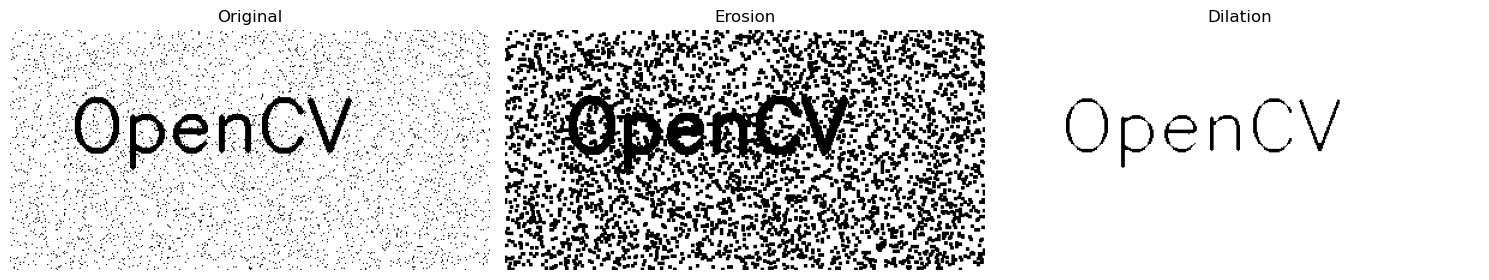

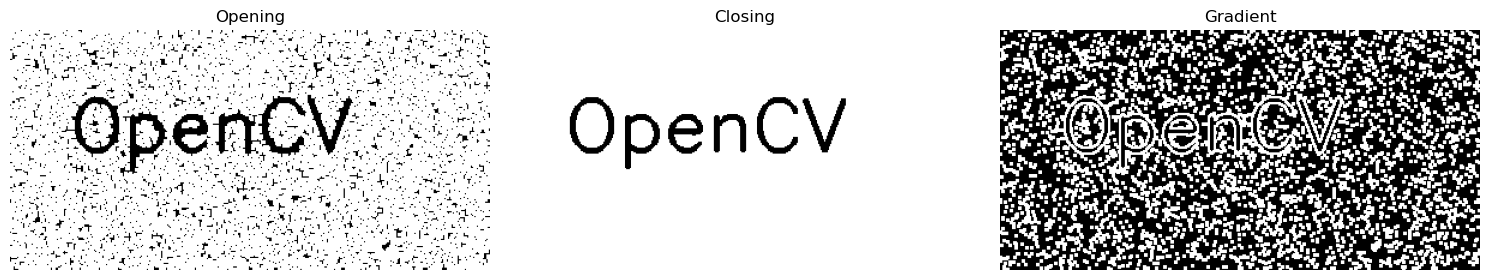


2. Noise Removal Applications


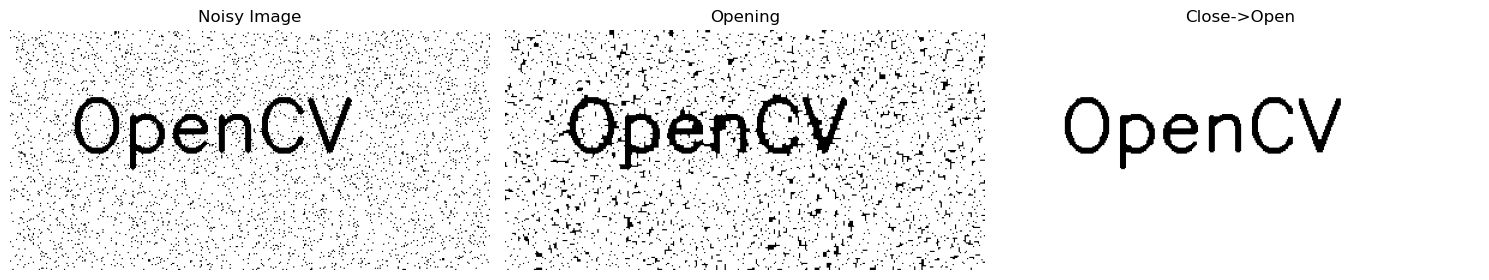

In [ ]:


def morphological_operations_demo():
    # Create sample image
    original = create_sample_image()
    
    # Define kernels
    kernel_3x3 = np.ones((3, 3), np.uint8)
    kernel_5x5 = np.ones((5, 5), np.uint8)
    
    # 1. Erosion
    eroded = cv2.erode(original, kernel_3x3, iterations=1)
    
    # 2. Dilation
    dilated = cv2.dilate(original, kernel_3x3, iterations=1)
    
    # 3. Opening (Erosion followed by Dilation)
    opened = cv2.morphologyEx(original, cv2.MORPH_OPEN, kernel_3x3)
    
    # 4. Closing (Dilation followed by Erosion)
    closed = cv2.morphologyEx(original, cv2.MORPH_CLOSE, kernel_3x3)
    
    # 5. Gradient (Difference between Dilation and Erosion)
    gradient = cv2.morphologyEx(original, cv2.MORPH_GRADIENT, kernel_3x3)
    
    # Show basic operations
    show_results([original, eroded, dilated],
                ['Original', 'Erosion', 'Dilation'])
    
    # Show advanced operations
    show_results([opened, closed, gradient],
                ['Opening', 'Closing', 'Gradient'])

def noise_removal_demo():
    # Create noisy image
    img = create_sample_image()
    
    # Apply different combinations of operations
    kernel = np.ones((3, 3), np.uint8)
    
    # Method 1: Opening (removes small noise)
    denoised1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    
    # Method 2: Closing followed by Opening
    denoised2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    denoised2 = cv2.morphologyEx(denoised2, cv2.MORPH_OPEN, kernel)
    
    # Show results
    show_results([img, denoised1, denoised2],
                ['Noisy Image', 'Opening', 'Close->Open'])

def main():
    print("1. Basic Morphological Operations Demo")
    morphological_operations_demo()
    
    print("\n2. Noise Removal Applications")
    noise_removal_demo()

if __name__ == "__main__":
    main()